# https://realpython.com/python-matplotlib-guide/

In [2]:
import os

import numpy as np
np.random.seed(444)
import pandas as pd
from scipy import stats

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set(style='ticks', context='talk')

import requests

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [3]:
# setting directories for file loads and saves
raw_dir = "../data/raw/"
load_dir = save_dir = "../data/interim/"
final_dir = "../data/processed/"

logs_dir = "../data/logs/"

In [4]:
nap = pd.read_csv(save_dir + '2017_year_7_results_schools_info.csv', index_col=0)
nap.head()

,school_id,grade,year,domain,mean,lower,upper,calendar_year,school_name,state,...,icsea,bottom_sea_quarter,lower_middle_sea_quarter,upper_middle_sea_quarter,top_sea_quarter,fte_teachers,fte_other_staff,total_enrolments,indigenous_enrolments,lote
0,40001,7,2017,Reading,589,572,606,2017,Fahan School,TAS,...,1130.0,4.0,11.0,26.0,59.0,33.3,21.7,372.0,1.0,7.0
1,40001,7,2017,Writing,564,544,585,2017,Fahan School,TAS,...,1130.0,4.0,11.0,26.0,59.0,33.3,21.7,372.0,1.0,7.0
2,40001,7,2017,Spelling,569,550,587,2017,Fahan School,TAS,...,1130.0,4.0,11.0,26.0,59.0,33.3,21.7,372.0,1.0,7.0
3,40001,7,2017,Grammar and Punctuation,593,572,613,2017,Fahan School,TAS,...,1130.0,4.0,11.0,26.0,59.0,33.3,21.7,372.0,1.0,7.0
4,40001,7,2017,Numeracy,581,564,599,2017,Fahan School,TAS,...,1130.0,4.0,11.0,26.0,59.0,33.3,21.7,372.0,1.0,7.0


In [30]:
nap_model = nap.dropna()

In [176]:
x = nap_model['mean']
y = nap_model['icsea']

In [182]:
gradient,intercept,r_value,p_value,std_err = stats.linregress(x,y)

print("Gradient and intercept",gradient,intercept)
print("R-squared",r_value**2)
print("p-value",p_value)

Gradient and intercept 1.733021114113949 80.56679808832416
R-squared 0.7319242307959912
p-value 0.0


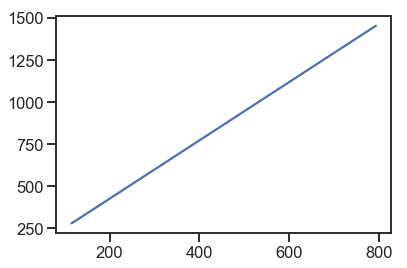

In [218]:
xstat = np.linspace(x.min(), x.max(), len(x))
ystat = []
for i in range(len(xstat)):
    ystat.append(((gradient * xstat[i]) + intercept))
plt.plot(xstat, ystat)


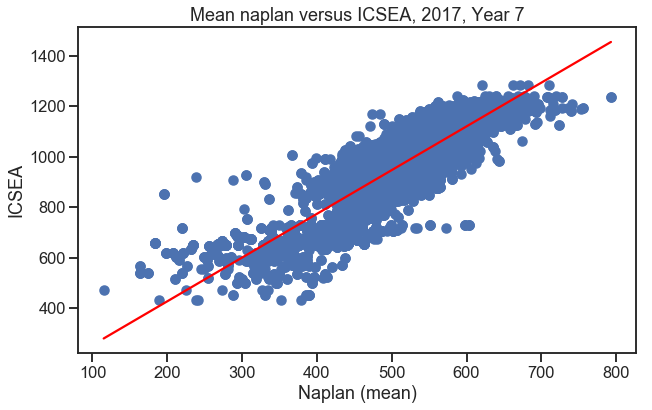

In [219]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
ax.set_title('Mean naplan versus ICSEA, 2017, Year 7')
ax.set_ylabel('ICSEA')
ax.set_xlabel('Naplan (mean)')
plt.plot(xstat, ystat, 
         color = 'red')
#fig.tight_layout()

In [178]:
gradient,intercept,r_value,p_value,std_err = stats.linregress(x,y)

print("Gradient and intercept",gradient,intercept)
print("R-squared",r_value**2)
print("p-value",p_value)

Gradient and intercept 1.733021114113949 80.56679808832416
R-squared 0.7319242307959912
p-value 0.0


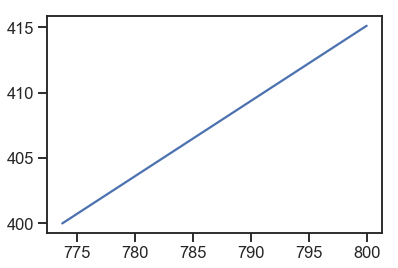

In [181]:
plt.plot([((gradient * 400) + intercept), 800], [400, (800 - intercept) / gradient])

In [58]:
# initialise instance or LR model
lm = LinearRegression(fit_intercept=True)

# Create model
lm.fit(x[:, np.newaxis], y)

print('Estimated intercept coefficient:', lm.intercept_, '\n'
     'Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: 80.56679808832371 
Number of coefficients: 1


In [63]:
# create model data over range of naplan results
xfit = np.linspace(x.min(), x.max(), len(y))
yfit = lm.predict(xfit[:, np.newaxis])

Text(0.5,0,'Naplan (mean)')

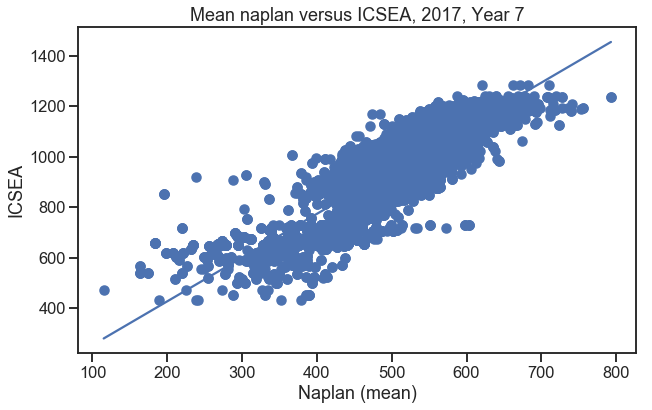

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y)
ax.plot(xfit, yfit)
ax.set_title('Mean naplan versus ICSEA, 2017, Year 7')
ax.set_ylabel('ICSEA')
ax.set_xlabel('Naplan (mean)')

#fig.tight_layout()


In [82]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y.sort_values(), yfit))
# r2_score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y.sort_values(), yfit))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % explained_variance_score(y.sort_values(), yfit))


Mean squared error: 74493.36
Variance score: -5.15
Variance score: -3.89


In [172]:
from scipy import stats

In [85]:
from sklearn.model_selection import train_test_split

In [147]:
x = nap_model['mean'].values.reshape(-1, 1)
y = nap_model['icsea'].values

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.5, random_state = 5)

In [160]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(12064, 1) (12064, 1) (12064,) (12064,)


In [161]:
lm2 = LinearRegression(fit_intercept=True)

In [162]:
print(type(X_test), X_test.shape)

<class 'numpy.ndarray'> (12064, 1)


In [163]:
lm2.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [164]:
pred_train = lm2.predict(X_train)
pred_test = lm2.predict(X_test)

In [165]:
print('Fit a model X_train, and calculate MSE with Y_train:', 
      np.mean((Y_train - lm.predict(X_train)) ** 2)
     )

print('Fit a model X_train, and calculate MSE with X_test, Y_test:', 
      np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 3329.2533962814186
Fit a model X_train, and calculate MSE with X_test, Y_test: 3169.8539917737367


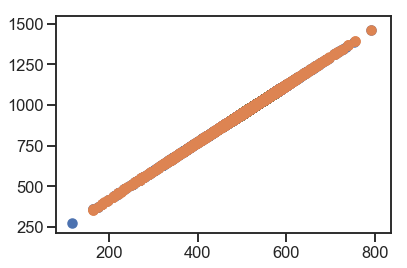

In [170]:
plt.scatter(X_train, pred_train)
plt.scatter(X_test, pred_test)

In [93]:
url = ("http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz")

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# type the response
type(r)

requests.models.Response